__Naive Bayes: Group of extremely fast and simple classification algorithms suitable for high-dimensional datasets__

### Bayesian Classification
The Naive has to do with the assumption made to simplify the creation of the generative model

Bayes theorem: 
$$ P(L\ |\ Features) = \frac{P(features\ |\ L)P(L)}{P(features)} $$

### Gaussian Naive bayes
Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

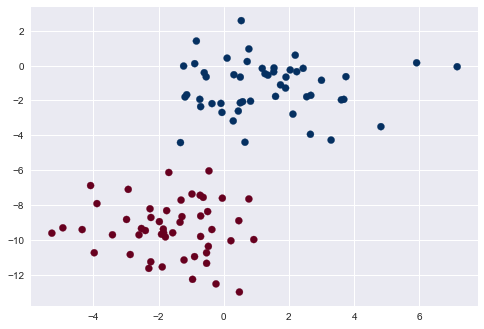

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [13]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

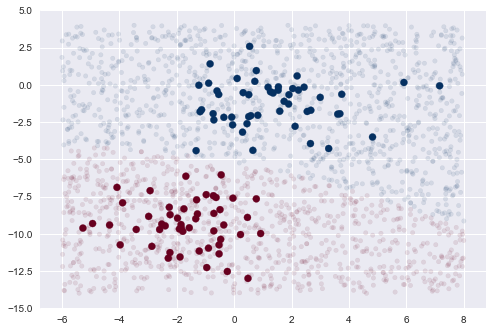

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1);

__In general the boundary in Gaussian naive Bayes is quadratic__.
__It naturally allows for probabilistic calssification__

In [15]:
# we can comupe Prob.
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

The columns give the posterior probabilities for the first and second label.

[see Here for simple example](https://en.wikipedia.org/wiki/Posterior_probability)

__the final classification will only be as good as the model assumptions that
lead to it, which is why Gaussian naive Bayes often does not produce very good
results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method__

### Multinomial naive Bayes
where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

[The multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for rolling a k-sided die n times

When n is 1 and k is 2, the multinomial distribution is the Bernoulli distribution. When k is 2 and number of trials are more than 1, it is the binomial distribution. When n is 1, it is the categorical distribution.](https://en.wikipedia.org/wiki/Multinomial_distribution)

#### Example Classifying Text
One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In [20]:
from sklearn.datasets import fetch_20newsgroups
data  = fetch_20newsgroups()

In [24]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
# let's select just a few of the categories
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [27]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [32]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [33]:
model.fit(train.data, train.target)
labels  = model.predict(test.data)

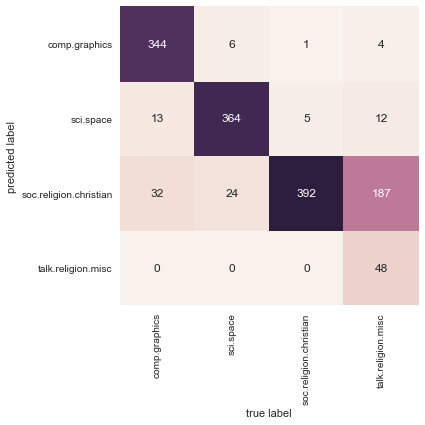

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [44]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    pred_prob = np.max(model.predict_proba([s]))
    return (train.target_names[pred[0]], pred_prob)

In [45]:
predict_category('sending a payload to the ISS')

('sci.space', 0.42116336996513903)

In [46]:
predict_category('the work of God must be dine with fear and uprightness')

('soc.religion.christian', 0.78568818599325907)

In [47]:
predict_category('Friday is for chilling')

('sci.space', 0.30571759775202956)

__this is nothing more sophisticated than a simple probability model
for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.__

### When to Use NB
Though not generally complicated;
- Advantages
    - They are extremely fast for both training and prediction
    - They provide straightforward probabilistic prediction
    - They are often very easily interpretable
    - They have very few (if any) tunable parameters
   
- It should serve as a baseline and performs well given the following conditions
    - When the naive assumptions actually match the data (very rare in practice)
    - For very well-separated categories, when model complexity is less important
    - For very high-dimensional data, when model complexity is less important
    (provided the additional dimensions add new information)